In [1]:
#Import libraries:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from xgboost import XGBRegressor 
from sklearn import metrics   #Additional scklearn functions
from sklearn.model_selection import GridSearchCV
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from matplotlib.pylab import rcParams

In [2]:
# Define the data types for each column
data_types = {
    'nameFull':'str',
    'bookingNumber':'str',
    'caseNumber':'str',
    'inmateNumber':'str',
    'housing1':'str',
    'housing1a':'str',
    'housing2':'str',
    'housing3': 'str',
    'nameLast':'str',
    'nameFirst':'str',
    'nameMiddle':'str',
    'age': 'float',
    'sex': 'category',
    'race': 'category',
    'eyeColor': 'category',
    'hairColor': 'category',
    'height': 'float',
    'weight': 'float',
    'bond': 'float',
    'bail': 'float',
    'topcharge': 'category',
    'county':'category',
    'Top Poliytical': 'category'
}

# Specify which columns should be parsed as datetime
date_columns = ['date', 'bookingDate', 'dob', 'firstappearance']
df = pd.read_csv('CensusJDI.csv',dtype= data_types, parse_dates = date_columns)
df.dropna(subset=['nameFull'], inplace=True)

# Determining average Incarcerated Days

In [13]:
# Calculate the average duration for each county
average_duration_by_county = df.groupby('county')['incarcerated_days'].mean()

# Print the results
print("Average duration of incarceration for each county:")
print(average_duration_by_county)

Average duration of incarceration for each county:
county
Monterey           53.539849
Santa Cruz         39.138998
Tulare             46.122520
Madera             53.038180
Calaveras          30.479263
San Francisco      32.300864
Marin              30.718548
Shasta             34.917212
Merced             62.768359
Santa Barbara      44.360608
Orange             42.495758
Sutter             33.805893
Kern               39.123798
Lake               38.153328
San Mateo          40.728467
Los Angeles        46.732094
Mono               27.000000
Placer             45.829766
Amador             39.722640
El Dorado          69.596109
Inyo               40.436836
Kings              67.143786
Humboldt           36.240545
Mendocino          31.676908
Napa               38.598724
Solano             32.568978
San Luis Obispo    44.595827
Riverside          36.565631
Yuba               42.972029
Fresno             62.013568
Siskiyou           35.951000
Mariposa           32.450065
Nevada        

In [14]:
# Calculate the average duration for each of the specified counties
average_duration_by_county = df.groupby('county')['incarcerated_days'].mean().mean()

# Print the results
print("Average duration of incarceration for the all counties:")
print(average_duration_by_county)

Average duration of incarceration for the all counties:
42.728821682096076


# PCA for features selection

In [45]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Convert date-related columns to datetime
#date_columns = ['bookingDate', 'dob', 'firstappearance', 'date']
#for col in date_columns:
    #df[col] = pd.to_datetime(df[col], errors='coerce')

# Select the relevant columns for PCA and XGBoost
selected_columns = ['age', 'dob', 'sex', 'race',
       'eyeColor', 'hairColor', 'height', 'weight', 'bond', 'bail',
       'topcharge', 'firstappearance', 'county', 'date', 'incarcerated_days',
       'Population', 'Asian Pop', 'Black Pop', 'Hispanic Pop', 'White Pop',
       'Native Pop', 'Multi-Race Pop', 'Other Pop', 'Avg Hsld Size',
       'Avg Fam Size', 'Owned Housing', 'Rented Housing', 'Health Cov',
       'No Health Cov', 'Med Monthly Housing', 'Poverty %', 'Male Poverty %',
       'Female Poverty %', 'White Poverty %', 'Black Poverty %',
       'Native Poverty %', 'Asian Poverty %', 'Other Poverty %',
       'Hispanic Poverty %', 'Multi-Race Poverty %', 'Black Unemp %',
       'Native Unemp %', 'Asian Unemp %', 'Other Unemp %',
       'Multi-Race Unemp %', 'Hispanic Unemp %', 'White Unemp %',
       'Male Unemp %', 'Female Unemp %', 'LTHS Unemp %', 'HS Unemp %',
       'SC/AD Unemp %', 'Bach./Higher Unemp %', 'Top Political']

# Extract the selected columns and standardize the data
X = df[selected_columns].copy()
X = X.apply(pd.to_numeric, errors='coerce')  # Convert to numeric
X.fillna(0, inplace=True)  # Handle missing values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
n_components = 2  # You can choose the number of principal components
pca = PCA(n_components=n_components)
principalComponents = pca.fit_transform(X_scaled)

# Access the loadings (coefficients) for each feature in the principal components
loadings = pca.components_

# Create a DataFrame to show the feature loadings for each component
loadings_df = pd.DataFrame(data=loadings, columns=X.columns, index=['PC1', 'PC2'])

In [46]:
from sklearn.decomposition import PCA
import pandas as pd

# Find the principal component with the highest loading for each variable
max_loading_components = loadings_df.abs().idxmax()

# Print the results
print("Variable-to-Principal Component Mapping:")
print(max_loading_components)

Variable-to-Principal Component Mapping:
age                     PC2
dob                     PC2
sex                     PC2
race                    PC2
eyeColor                PC2
hairColor               PC2
height                  PC2
weight                  PC1
bond                    PC2
bail                    PC2
topcharge               PC2
firstappearance         PC2
county                  PC1
date                    PC2
incarcerated_days       PC2
Population              PC2
Asian Pop               PC2
Black Pop               PC2
Hispanic Pop            PC2
White Pop               PC2
Native Pop              PC2
Multi-Race Pop          PC2
Other Pop               PC1
Avg Hsld Size           PC2
Avg Fam Size            PC2
Owned Housing           PC2
Rented Housing          PC2
Health Cov              PC2
No Health Cov           PC2
Med Monthly Housing     PC1
Poverty %               PC1
Male Poverty %          PC1
Female Poverty %        PC1
White Poverty %         PC1
Black P

### Interpretation:
- PC1 seems to capture features related to various socio-economic factors and political indicators.
- PC2 captures features related to demographic information, incarceration details, and population statistics.

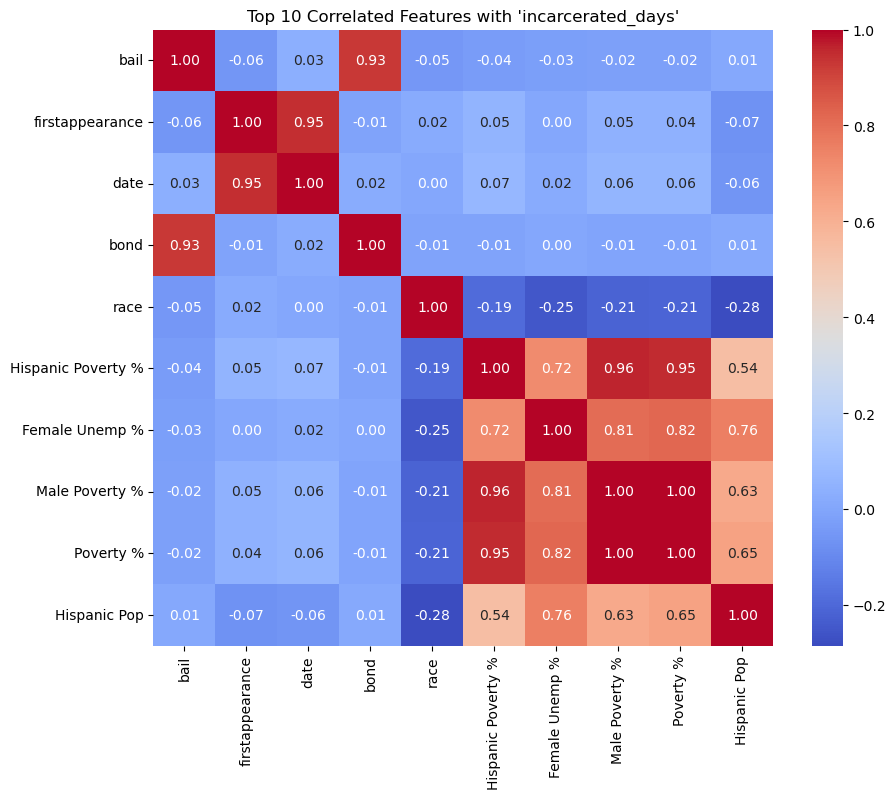

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


features = ['age', 'dob', 'sex', 'race',
       'eyeColor', 'hairColor', 'height', 'weight', 'bond', 'bail',
       'topcharge', 'firstappearance', 'county', 'date', 'incarcerated_days',
       'Population', 'Asian Pop', 'Black Pop', 'Hispanic Pop', 'White Pop',
       'Native Pop', 'Multi-Race Pop', 'Other Pop', 'Avg Hsld Size',
       'Avg Fam Size', 'Owned Housing', 'Rented Housing', 'Health Cov',
       'No Health Cov', 'Med Monthly Housing', 'Poverty %', 'Male Poverty %',
       'Female Poverty %', 'White Poverty %', 'Black Poverty %',
       'Native Poverty %', 'Asian Poverty %', 'Other Poverty %',
       'Hispanic Poverty %', 'Multi-Race Poverty %', 'Black Unemp %',
       'Native Unemp %', 'Asian Unemp %', 'Other Unemp %',
       'Multi-Race Unemp %', 'Hispanic Unemp %', 'White Unemp %',
       'Male Unemp %', 'Female Unemp %', 'LTHS Unemp %', 'HS Unemp %',
       'SC/AD Unemp %', 'Bach./Higher Unemp %', 'Top Political']

selected_features = df[features].copy()

# Initialize a label encoder
label_encoder = LabelEncoder()
# Assuming 'county' is a column in your DataFrame 'df'
selected_features['county'] = label_encoder.fit_transform(selected_features['county'])
selected_features['Top Political'] = label_encoder.fit_transform(selected_features['Top Political'])

#Calculate correlation matrix
correlation_matrix = selected_features.corr()

# Extract the top 10 correlated features with 'incarcerated_days'
top_correlated_features = correlation_matrix['incarcerated_days'].abs().nlargest(11).index[1:]

# Select only the top correlated features
top_correlation_matrix = selected_features[top_correlated_features].corr()

# Set the size of the heatmap
plt.figure(figsize=(10, 8))

# Create the heatmap using Seaborn
sns.heatmap(top_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set the title (optional)
plt.title("Top 10 Correlated Features with 'incarcerated_days'")

# Save the plot
#plt.savefig('top_correlation_map_features.png', transparent=True)

# Show the plot
plt.show()

# Statistical Method for Significant Predictors

In [39]:
from sklearn.preprocessing import LabelEncoder

features = ['age', 'sex', 'race',
       'eyeColor', 'hairColor', 'height', 'weight', 'bond', 'bail',
       'topcharge', 'firstappearance', 'county', 'date',
       'Population', 'Asian Pop', 'Black Pop', 'Hispanic Pop', 'White Pop',
       'Native Pop', 'Multi-Race Pop', 'Other Pop', 'Avg Hsld Size',
       'Avg Fam Size', 'Owned Housing', 'Rented Housing', 'Health Cov',
       'No Health Cov', 'Med Monthly Housing', 'Poverty %', 'Male Poverty %',
       'Female Poverty %', 'White Poverty %', 'Black Poverty %',
       'Native Poverty %', 'Asian Poverty %', 'Other Poverty %',
       'Hispanic Poverty %', 'Multi-Race Poverty %', 'Black Unemp %',
       'Native Unemp %', 'Asian Unemp %', 'Other Unemp %',
       'Multi-Race Unemp %', 'Hispanic Unemp %', 'White Unemp %',
       'Male Unemp %', 'Female Unemp %', 'LTHS Unemp %', 'HS Unemp %',
       'SC/AD Unemp %', 'Bach./Higher Unemp %', 'Top Political']

selected_features = df[features].copy()

#replace nan value in bond and bail with 0
selected_features.loc[:,'bond'].fillna(0, inplace = True)
selected_features.loc[:,'age'].fillna(selected_features['age'].mean(), inplace = True)
selected_features.loc[:,'bail'].fillna(0, inplace = True)

# Convert 'firstappearance' to the year as an integer
selected_features.loc[:,'firstappearance'] = selected_features['firstappearance'].dt.year
selected_features.loc[:,'firstappearance'] = selected_features['firstappearance'].astype(int)
selected_features.loc[:,'date'] = selected_features['date'].dt.year
selected_features.loc[:,'date'] = selected_features['date'].astype(int)

# Convert 'sex' and 'topcharge' to categorical columns
selected_features['sex'] = selected_features['sex'].astype('int')
selected_features['eyeColor'] = selected_features['eyeColor'].astype('int')
selected_features['hairColor'] = selected_features['hairColor'].astype('int')
selected_features['race'] = selected_features['race'].astype('int')
selected_features['topcharge'] = selected_features['topcharge'].astype('int')

# Create a LabelEncoder instance
label_encoder = LabelEncoder()
# Assuming 'county' is a column in your DataFrame 'df'
selected_features['county'] = label_encoder.fit_transform(selected_features['county'])
selected_features['Top Political'] = label_encoder.fit_transform(selected_features['Top Political'])

# Perform logistic regression
import statsmodels.api as sm

linear_model = sm.OLS(df['incarcerated_days'], selected_features)
result = linear_model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:      incarcerated_days   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                 2.070e+04
Date:                Wed, 08 Nov 2023   Prob (F-statistic):               0.00
Time:                        15:14:17   Log-Likelihood:            -3.3563e+06
No. Observations:              601261   AIC:                         6.713e+06
Df Residuals:                  601214   BIC:                         6.713e+06
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
age                      0.0248 

### Interpretation: 

- An R-squared of 0.613 means that approximately 61.3% of the variability in the number of incarcerated days can be explained by the independent variable included in the regression models. 
- The log-likelihood suggests that the model provides a good fit to the data.
- AIC and BIC provide a balance between model fit and complexity. In this case, both AIC and BIC are the same, and the absolute values are not as important as their relative values when comparing different models. Lower AIC and BIC values indicate a better-fitting model with fewer unnecessary parameter

### Significant Predictors:

The predictors with p-values less than 0.05 are typically considered statistically significant. Therefore, all the predictors listed above, except "No Health Cov," "White Poverty %," "Other Unemp %," "Multi-Race Unemp %," "Hispanic Unemp %," and "Top Political," can be considered significant predictors in this analysis.

#### Example way of interpreting p-value in this case: 

Age:

- Coefficient: 0.0248
- P-value: 0.001 (which is less than the commonly used significance level of 0.05)
- The positive coefficient for age suggests that as the age increases by one unit, the dependent variable (incarcerated_days) is expected to increase by 0.0248 units. The low p-value indicates that this relationship is statistically significant.

Sex:

- Coefficient: -0.5405
- P-value: 0.000 (very close to zero)
- The negative coefficient for sex suggests that, in comparison to the reference category (assuming this is a binary variable with a reference category), being in the other category (compared to the reference) is associated with a decrease of 0.5405 units in the dependent variable. The very low p-value indicates that this relationship is statistically significant.



In [50]:
from sklearn.linear_model import Lasso

X = selected_features
y = df['incarcerated_days']

lasso_model = Lasso(alpha=0.1)  # You can adjust the regularization strength (alpha)
result = lasso_model.fit(X, y)

# Retrieve the coefficients and their significance
feature_coef = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso_model.coef_})
feature_coef['Significant'] = feature_coef['Coefficient'] != 0

/Users/besocxinh/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.231e+09, tolerance: 6.418e+05
  model = cd_fast.enet_coordinate_descent(


In [48]:
print(feature_coef)

                 Feature   Coefficient  Significant
0                    age  2.742650e-02         True
1                    sex -4.099318e-01         True
2                   race -6.818528e-01         True
3               eyeColor  5.684560e-01         True
4              hairColor -8.132945e-01         True
5                 height  3.561289e-01         True
6                 weight  3.072662e-02         True
7                   bond  1.954785e-06         True
8                   bail  1.412066e-05         True
9              topcharge  1.319113e+00         True
10       firstappearance -2.402047e+02         True
11                county  1.573715e-01         True
12                  date  2.393472e+02         True
13            Population -1.264143e-06         True
14             Asian Pop -9.884973e-02         True
15             Black Pop -3.424199e-03         True
16          Hispanic Pop  3.229274e-01         True
17             White Pop -0.000000e+00        False
18          

#### Interpretation

In Lasso regression, the coefficients are penalized to be exactly zero, which leads to feature selection. When the coefficient of a predictor is zero, it means that the predictor is not contributing to the model, and the corresponding feature can be considered as not significant.

### Results 

The significant predictors that are common to both models are:
- age
- sex
- race
- eyeColor
- hairColor
- height
- weight
- bond
- bail
- topcharge
- firstappearance
- county
- date
- Population
- Asian Pop
- Black Pop
- Hispanic Pop
- Owned Housing
- Rented Housing
- Health Cov
- No Health Cov
- Med Monthly Housing
- Male Poverty %
- White Poverty %
- Black Poverty %
- Native Poverty %
- Asian Poverty %
- Other Poverty %
- Hispanic Poverty %
- LTHS Unemp %
- HS Unemp %
- SC/AD Unemp %
- Bach./Higher Unemp %

These are the predictors that both models agree are significant in explaining the variance in the response variable.

### Note

Distinguishing between Significant Predictors and Feature Importance
- Context:

    - Significant predictors are often discussed in the context of statistical models and hypothesis testing.
    - Feature importance is a concept more commonly associated with machine learning models.
- Methodology:

    - Significance in statistical models is often determined through hypothesis testing and p-values.
    - Feature importance in machine learning models is computed using various algorithms specific to the model type.
- Interpretation:

    - Significance indicates a meaningful relationship between a predictor and the response variable.
    - Feature importance reflects the contribution of a feature to the overall predictive performance of the model.
    
In practice, if you're working with statistical models, you might talk about significant predictors. In machine learning, especially with ensemble models, you're more likely to discuss feature importance. Both concepts aim to identify variables that are crucial for understanding or predicting the outcome, but they come from different traditions of statistical analysis.

# Build a Mixed-Effects (multi-level) Models 

In [6]:
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
import statsmodels.formula.api as smf


features = ['age', 'sex', 'race','eyeColor', 'hairColor', 'height', 'weight', 'bond', 'bail',
            'topcharge', 'firstappearance', 'county', 'date','incarcerated_days',
            'Population', 'Asian Pop', 'Black Pop', 'Hispanic Pop', 'White Pop','Native Pop', 
            'Multi-Race Pop', 'Other Pop', 
            'Avg Hsld Size','Avg Fam Size', 'Owned Housing', 'Rented Housing', 
            'Health Cov','No Health Cov', 
            'Med Monthly Housing', 
            'Poverty %', 'Male Poverty %','Female Poverty %', 'White Poverty %', 'Black Poverty %',
            'Native Poverty %', 'Asian Poverty %', 'Other Poverty %','Hispanic Poverty %', 
            'Multi-Race Poverty %', 
            'Black Unemp %','Native Unemp %', 'Asian Unemp %', 'Other Unemp %','Multi-Race Unemp %', 
            'Hispanic Unemp %', 'White Unemp %','Male Unemp %', 'Female Unemp %', 'LTHS Unemp %', 
            'HS Unemp %','SC/AD Unemp %', 'Bach./Higher Unemp %', 
            'Top Political'] 
            
            #'time_gap','reincarceration', 'incarcerated_counts']

selected_features = df[features].copy()
# Replace spaces and special characters with underscores in column names
selected_features.columns = selected_features.columns.str.replace(' ', '_').str.replace('%', 'pct').str.replace('.', '').str.replace('-', '_').str.replace('/','_')

#replace nan value in bond and bail with 0
selected_features.loc[:,'bond'].fillna(0, inplace = True)
selected_features.loc[:,'age'].fillna(selected_features['age'].mean(), inplace = True)
selected_features.loc[:,'bail'].fillna(0, inplace = True)

# Convert 'firstappearance' to the year as an integer
selected_features.loc[:,'firstappearance'] = selected_features['firstappearance'].dt.year
selected_features.loc[:,'firstappearance'] = selected_features['firstappearance'].astype(int)
selected_features.loc[:,'date'] = selected_features['date'].dt.year
selected_features.loc[:,'date'] = selected_features['date'].astype(int)

# Convert 'sex' and 'topcharge' to categorical columns
selected_features['sex'] = selected_features['sex'].astype('int')
selected_features['eyeColor'] = selected_features['eyeColor'].astype('int')
selected_features['hairColor'] = selected_features['hairColor'].astype('int')
selected_features['race'] = selected_features['race'].astype('int')
selected_features['topcharge'] = selected_features['topcharge'].astype('int')

# Create a LabelEncoder instance
label_encoder = LabelEncoder()
# Assuming 'county' is a column in your DataFrame 'df'
selected_features['county'] = label_encoder.fit_transform(selected_features['county'])
selected_features['Top_Political'] = label_encoder.fit_transform(selected_features['Top_Political'])

import statsmodels.api as sm
import statsmodels.formula.api as smf

# Create a formula for the model excluding the 'reincarceration' column
formula = 'incarcerated_days ~ ' + ' + '.join(selected_features.columns.difference(['incarcerated_days'])) + ' + (1 | county)'

# Fit the mixed-effects model
mixed_model = smf.mixedlm(formula, data=selected_features, groups=selected_features['county'])
result = mixed_model.fit()

# Print the summary
print(result.summary())

/Users/besocxinh/anaconda3/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2262: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


                           Mixed Linear Model Regression Results
Model:                       MixedLM          Dependent Variable:          incarcerated_days
No. Observations:            601261           Method:                      REML             
No. Groups:                  35               Scale:                       4131.6658        
Min. group size:             500              Log-Likelihood:              -3356306.7525    
Max. group size:             116388           Converged:                   Yes              
Mean group size:             17178.9                                                        
--------------------------------------------------------------------------------------------
                          Coef.       Std.Err.      z     P>|z|     [0.025         0.975]   
--------------------------------------------------------------------------------------------
Intercept               -58296.683 419000494.646   -0.000 1.000 -821284175.692 821167582.327
Asian

/Users/besocxinh/anaconda3/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2706: RuntimeWarning: invalid value encountered in sqrt
  sdf[0:self.k_fe, 1] = np.sqrt(np.diag(self.cov_params()[0:self.k_fe]))


The output you provided is from a Mixed Linear Model (MixedLM) regression analysis. This type of model is used when dealing with data that has a hierarchical or clustered structure, where observations are grouped into different categories, and there may be dependencies within each group. In this specific case, it seems the dependent variable is "incarcerated_days," and there are various independent variables included in the model.

Here are some key points to interpret the results:

1. Model Information:

    - Observations and Groups: There are 601,261 observations grouped into 35 groups.
    - Convergence: The model has converged successfully.
2. Coefficients:

    - Each coefficient represents the estimated change in the dependent variable associated with a one-unit change in the corresponding independent variable, holding other variables constant.
3. Significance:
   
    - The "z" column and associated p-values (P>|z|) indicate the statistical significance of each coefficient. For example, a p-value less than 0.05 is often considered statistically significant.
4. Confidence Intervals:

    - The [0.025, 0.975] columns provide the 95% confidence interval for each coefficient. This interval gives a range within which we can be reasonably confident the true coefficient lies.
5. Fixed Effects:

    - The fixed effects include variables like "age," "bail," "bond," "county," "date," "eyeColor," etc.
6. Random Effects:

    - The "Group Var" represents the estimated variance of the random effects at the group level. This is important in mixed-effects models as it accounts for variability between groups.
7. Intercept:

    - The intercept represents the estimated value of the dependent variable when all other predictors are zero.
8. Group-Specific Intercept:

    - The coefficient for "county" (4558.547) is likely a group-specific intercept.
9. Specific Variables:

    - Some coefficients, like "Avg_Fam_Size," "Health_Cov," "Female_Poverty_pct," etc., have missing values or zero estimates. This might indicate issues with these variables in the model or they might not be contributing significantly.
10. Variable Interpretation:

    - For example, the coefficient for "age" (0.025) suggests that, on average, for a one-unit increase in age, there is a 0.025 unit increase in the dependent variable, holding other variables constant.

Evaluating the goodness of fit for a mixed-effects model involves assessing several aspects of the model's performance. Here are some common approaches and considerations:

- Log-Likelihood and AIC/BIC:
    - The log-likelihood value in your output is -3356306.7525. Lower values indicate a better fit.

In [7]:
# Adjust the significance level as needed
significance_level = 0.05

# Extract coefficients and p-values from the model summary
coefficients = result.params
p_values = result.pvalues

# Create a DataFrame with coefficients and p-values
coefficients_df = pd.DataFrame({'Coefficient': coefficients, 'P-Value': p_values})

# Filter significant predictors based on the significance level
significant_predictors = coefficients_df[coefficients_df['P-Value'] < significance_level]

# Display the significant predictors
print("Significant Predictors:")
print(significant_predictors)

Significant Predictors:
                 Coefficient        P-Value
age                 0.024798   1.193655e-03
bail                0.000014   0.000000e+00
bond                0.000002   0.000000e+00
date              241.020057   0.000000e+00
eyeColor            0.579575   6.041680e-11
firstappearance  -242.103585   0.000000e+00
hairColor          -0.836910   6.128742e-22
height              0.413493   1.903349e-35
race               -1.071495   1.353268e-50
sex                -0.540493   9.387474e-12
topcharge           1.675985  4.110924e-263
weight              0.027674   4.822353e-17


In [8]:
import statsmodels.api as sm
import pandas as pd
from scipy.stats import chi2

# Assuming 'result' is the variable containing the mixed-effects model result

# Create a formula for the model excluding the 'reincarceration' column
original_formula = 'incarcerated_days ~ ' + ' + '.join(selected_features.columns.difference(['incarcerated_days'])) + ' + (1 | county)'
original_model = smf.mixedlm(original_formula, data=selected_features, groups=selected_features['county'])
original_result = original_model.fit()

# Fit a null model (intercept-only model)
null_formula = 'incarcerated_days ~ 1'  # 1 indicates an intercept-only model
null_model = smf.mixedlm(null_formula, data=selected_features, groups=selected_features['county'])
null_result = null_model.fit()


# Get log-likelihood values for the current and null models
log_likelihood_current = original_result.llf
log_likelihood_null = null_result.llf

# Compute the number of parameters for each model
num_params_current = original_result.df_modelwc
num_params_null = null_result.df_modelwc

# Perform a likelihood ratio test
likelihood_ratio_test = -2 * (log_likelihood_null - log_likelihood_current)
degrees_of_freedom = num_params_current - num_params_null

# Avoid negative degrees of freedom
degrees_of_freedom = max(0, degrees_of_freedom)

# Calculate the p-value
p_value = 1.0 - chi2.cdf(likelihood_ratio_test, degrees_of_freedom)

# Display results
print(f"Likelihood Ratio Test: {likelihood_ratio_test}")
print(f"Degrees of Freedom: {degrees_of_freedom}")
print(f"P-Value: {p_value}")

/Users/besocxinh/anaconda3/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2262: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
/Users/besocxinh/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/besocxinh/anaconda3/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


Likelihood Ratio Test: 566781.6976904375
Degrees of Freedom: 53
P-Value: 0.0


The likelihood ratio test is a statistical test used for comparing the goodness of fit of two nested models. In this context, it seems like you are comparing the fit of two mixed-effects models: one with a set of predictor variables (original_model) and another null model with only an intercept (null_model). The likelihood ratio test helps you assess whether including the additional predictor variables significantly improves the model fit.

Here's an interpretation of the results:

1. Likelihood Ratio Test Statistic (566781.6976904375):

    - This statistic is a measure of how well the more complex model (original model) fits the data compared to the simpler model (null model). Larger values indicate a greater improvement in fit.
2. Degrees of Freedom (53):

    - Degrees of freedom represent the number of parameters estimated in the model. In this context, it's the difference in the number of parameters between the original model and the null model.
3. P-Value (0.0):

    - The p-value is the probability of observing a likelihood ratio test statistic as extreme as the one computed if the null hypothesis were true (i.e., if the additional predictors have no effect).
    - A very low p-value (close to zero) suggests that the more complex model significantly improves the fit compared to the null model. In other words, you reject the null hypothesis in favor of the alternative hypothesis that the additional predictors are important.
    
In summary, the likelihood ratio test suggests that including the additional predictors in the original model leads to a significant improvement in the model fit compared to the null model. The p-value being very close to zero indicates strong evidence against the null hypothesis, supporting the idea that the added predictors are meaningful in explaining the variability in the response variable.

# Machine Learning Models for Feature Importances

In [60]:
not_selected = ['nameFull', 'bookingNumber', 'bookingDate', 'caseNumber',
       'inmateNumber', 'housing1', 'housing1a', 'housing2', 'housing3',
       'nameLast', 'nameFirst', 'nameMiddle', 'dob' , 'incarcerated_days', 
                'reincarceration', 'time_gap', 'reincarcerated_counts']

# Convert date-related columns to datetime
date_columns = ['firstappearance', 'date']
for col in date_columns:
    df.loc[:,col] = pd.to_datetime(df[col], errors='coerce')

#replace nan value in bond and bail with 0
df.loc[:,'bond'].fillna(0, inplace = True)
df.loc[:,'age'].fillna(df['age'].mean(), inplace = True)
df.loc[:,'bail'].fillna(0, inplace = True)

# Convert 'firstappearance' to the year as an integer
df.loc[:,'firstappearance'] = df['firstappearance'].dt.year
df.loc[:,'firstappearance'] = df['firstappearance'].astype(int)
df.loc[:,'date'] = df['date'].dt.year
df.loc[:,'date'] = df['date'].astype(int)


# Convert 'sex' and 'topcharge' to categorical columns
df['sex'] = df['sex'].astype('category')
df['eyeColor'] = df['eyeColor'].astype('category')
df['hairColor'] = df['hairColor'].astype('category')
df['race'] = df['race'].astype('category')
df['county'] = df['county'].astype('category')
#df = pd.get_dummies(df, columns=['county'], drop_first=True)
df['topcharge'] = df['topcharge'].astype('category')
df['Top Political'] = df['Top Political'].astype('category')
#df = pd.get_dummies(df, columns=['Top Political'], drop_first=True)

In [61]:
rcParams['figure.figsize'] = 12, 4

def modelfit(alg, dtrain, predictors, dtest ,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        #xgtrain = xgb.DMatrix(dtrain[predictors].values, 
                              #label=dtrain['reincarceration'].values, 
                              #enable_categorical = True)
        cvresult = xgb.cv(xgb_param, dtrain, 
                          num_boost_round=alg.get_params()['n_estimators'], 
                          nfold=cv_folds,
                          metrics='rmse', 
                          early_stopping_rounds=early_stopping_rounds,
                         verbose_eval = 50)

        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain.get_data(), dtrain.get_label())
    
    dtrain_predictions = alg.predict(dtrain.get_data())
    dtest_predictions = alg.predict(dtest.get_data())

    # Calculate RMSE for training and test sets
    train_rmse = np.sqrt(mean_squared_error(dtrain.get_label(), dtrain_predictions))
    test_rmse = np.sqrt(mean_squared_error(dtest.get_label(), dtest_predictions))
        
    # Print model report with RMSE
    print("\nModel Report")
    print(f"Training RMSE: {train_rmse}")
    print(f"Test RMSE: {test_rmse}")
                    
    
    feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False)
    feature_mapping = {f"f{idx}": name for idx, name in enumerate(X)}

    # Print feature importance scores
    print("Feature Importance Scores:")
    for feature, score in feat_imp.items():
        original_feature_name = feature_mapping.get(feature, "Unknown")
        print(f"{original_feature_name if original_feature_name != 'Unknown' else feature}: {score}")
        
    # Sort feature importances in descending order
    feat_imp = feat_imp.sort_values(ascending=False)

    # Get the feature names based on their index using the feature_mapping dictionary
    feature_names = [feature_mapping.get(feature, f"f{feature}") for feature in feat_imp.index]

    # Plot the feature importances with feature names
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.xticks(range(len(feature_names)), feature_names, rotation=90)  # Set x-axis labels
    plt.ylabel('Feature Importance Score')

[0]	train-rmse:102.71004+0.14479	test-rmse:102.76885+0.56696
[50]	train-rmse:92.51704+0.18899	test-rmse:95.63715+0.71720
[92]	train-rmse:91.27792+0.21951	test-rmse:95.73432+0.76128

Model Report
Training RMSE: 93.36729431152344
Test RMSE: 93.97209930419922
Feature Importance Scores:
age: 3108.0
weight: 2123.0
height: 1388.0
bond: 1362.0
topcharge: 1305.0
race: 979.0
bail: 671.0
eyeColor: 636.0
hairColor: 553.0
sex: 473.0
county: 373.0
Population: 277.0
Asian Pop: 184.0
Hispanic Pop: 139.0
Black Pop: 114.0
White Pop: 94.0
Owned Housing: 92.0
Other Pop: 89.0
Asian Poverty %: 77.0
Native Poverty %: 75.0
Native Pop: 73.0
Health Cov: 73.0
Avg Hsld Size: 67.0
Black Poverty %: 67.0
Black Unemp %: 67.0
Other Unemp %: 62.0
Multi-Race Pop: 61.0
SC/AD Unemp %: 52.0
Bach./Higher Unemp %: 50.0
Other Poverty %: 50.0
Med Monthly Housing: 48.0
Native Unemp %: 47.0
Asian Unemp %: 45.0
Multi-Race Unemp %: 42.0
LTHS Unemp %: 38.0
Avg Fam Size: 31.0
HS Unemp %: 31.0
Female Poverty %: 29.0
Female Unemp %: 

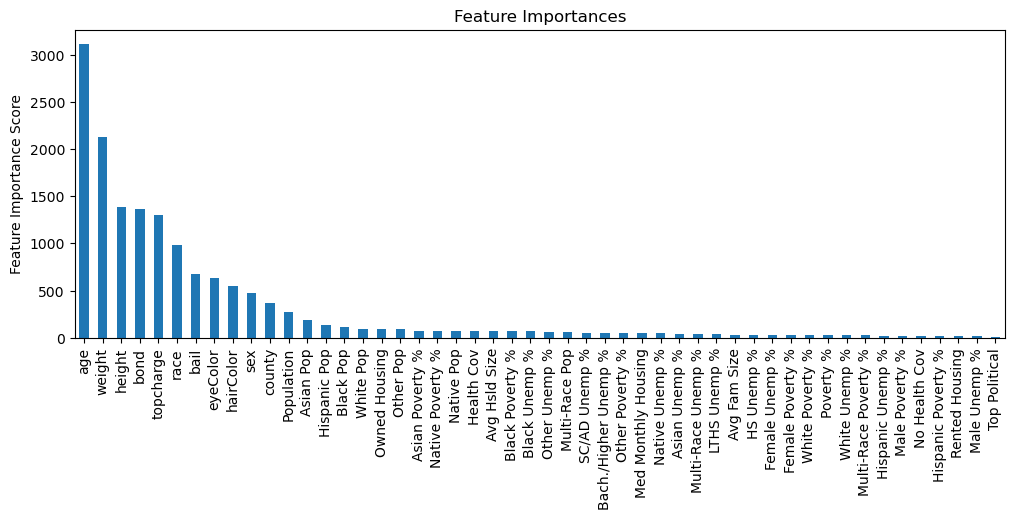

In [62]:
predictors = [x for x in df.columns if x not in not_selected] 
X = df[predictors]
y = df['incarcerated_days']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create a DMatrix with enable_categorical=True
dtrain = xgb.DMatrix(X_train, label = y_train, enable_categorical=True)
dtest = xgb.DMatrix(X_test, label = y_test, enable_categorical=True)

xgb1 = XGBRegressor(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=9,
 min_child_weight=0,
 gamma=0.3,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'reg:squarederror',
 nthread=4,
 scale_pos_weight=1,
 seed=27,
 enable_categorical = True)

modelfit(xgb1, dtrain, predictors, dtest = dtest)

### Common strong predictors:

- age
- race
- topcharge
- county
- Population (Asian Pop, White Pop, Black Pop etc.)
- Owned Housing

### Differences in strong predictors:

- Linear and Lasso Regression: Includes features like sex, eyeColor, hairColor, weight, bail, firstappearance, Rented Housing, Health Cov, No Health Cov, Med Monthly Housing, Male Poverty %, White Poverty %, Black Poverty %, Native Poverty %, Asian Poverty %, Other Poverty %, Hispanic Poverty %, LTHS Unemp %, HS Unemp %, SC/AD Unemp %, Bach./Higher Unemp %.

- XGBoost: Puts more emphasis on features like bond, height, Black Pop, White Pop, Other Pop, Asian Poverty %, Native Poverty %, Native Pop, Health Cov, Avg Hsld Size, Black Poverty %, Black Unemp %, Other Unemp %, Multi-Race Pop, SC/AD Unemp %, Bach./Higher Unemp %, Other Poverty %, Med Monthly Housing, Native Unemp %, Asian Unemp %, Multi-Race Unemp %, LTHS Unemp %, Avg Fam Size, HS Unemp %, Female Poverty %, Female Unemp %, White Poverty %, Poverty %, White Unemp %, Multi-Race Poverty %, Hispanic Unemp %, Male Poverty %, No Health Cov, Hispanic Poverty %, Rented Housing, Male Unemp %, Top Political.

It seems that while some features are common strong predictors, there are differences in the emphasis placed on certain features by the linear and Lasso regression compared to XGBoost models. The choice of strong predictors can be influenced by the modeling technique and the inherent characteristics of the data. Linear and Lasso regression focuses on coefficients and their statistical significance, while XGBoost considers the importance of features based on their contribution to the model's predictive performance (the ability of variables in making better prediction)

Note that: The importance score of a feature in XGBoost reflects its contribution to the model's predictive performance. A low score doesn't necessarily mean it's a weak predictor; it might indicate that the feature doesn't play a crucial role in the specific context of the model or that its contribution is overshadowed by other more influential features.